# Netflix Data Analysis

## 1. Introduction
This notebook provides an in-depth analysis of Netflix's content library. It includes data cleaning, exploration, and visualization to uncover trends in content production.


<h2>Library Imports </h2>

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import savgol_filter

<h1>1. Data Preparation </h1>

<h2>1.1 Loading the Dataset </h2>

In [270]:
# loading the dataset.
data = pd.read_csv('netflix_titles.csv')
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


<h2>1.2 Shape of data </h2>

In [271]:
data.shape

(8807, 12)

<h2>1.3 Columns in dataset </h2>

In [272]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h1>2 Cleaning the Dataset </h1>

<h3>2.1 Checking for missing Values </h3>

In [273]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h3>2.2 Checking for Unique Values </h3>

In [274]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

<h3>2.3 Checking for Duplicate Values </h2>

In [275]:
data.duplicated().sum()

0

<h1>3. Handling Missing Values </h1>

<h2> Replacing missing values in 'country' with the mode (most common) country </h2>

In [276]:
mode_country = data['country'].mode()[0]
data['country'] = data['country'].fillna(mode_country)

<h2>Replacing missing values in 'director' with a placeholder </h2>

In [277]:
data['director'] = data['director'].fillna('Unknown')

<h2>Replacing missing values in 'cast' with a placeholder </h2>

In [278]:
data['cast'] = data['cast'].fillna('Unknown')

<h2> Replacing missing values in 'rating' with a placeholder </h2>

In [279]:
data['rating'] = data['rating'].fillna('Unknown')

<h2> Replacing missing values in 'duration' with a placeholder </h2>

In [280]:
data['duration'] = data['duration'].fillna('Unknown')

<h2> Replacing missing values in 'date_added' with a placeholder </h2>

In [281]:
data['date_added'] = data['date_added'].fillna('Unknown')

In [282]:
data = data.drop_duplicates()

<h1>3.1 Checking the Values after Handling Missing Values </h1>

In [283]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<h1> Data Analysis </h1>

<h1> Counting and Sorting Shows by Release Year </h1>

In [285]:
shows_each_year = data.groupby('release_year').size()
shows_each_year = data['release_year'].value_counts().sort_index()
print(shows_each_year)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


<h1> Visualizing Shows Released Each Year in a Line Graph </h1>

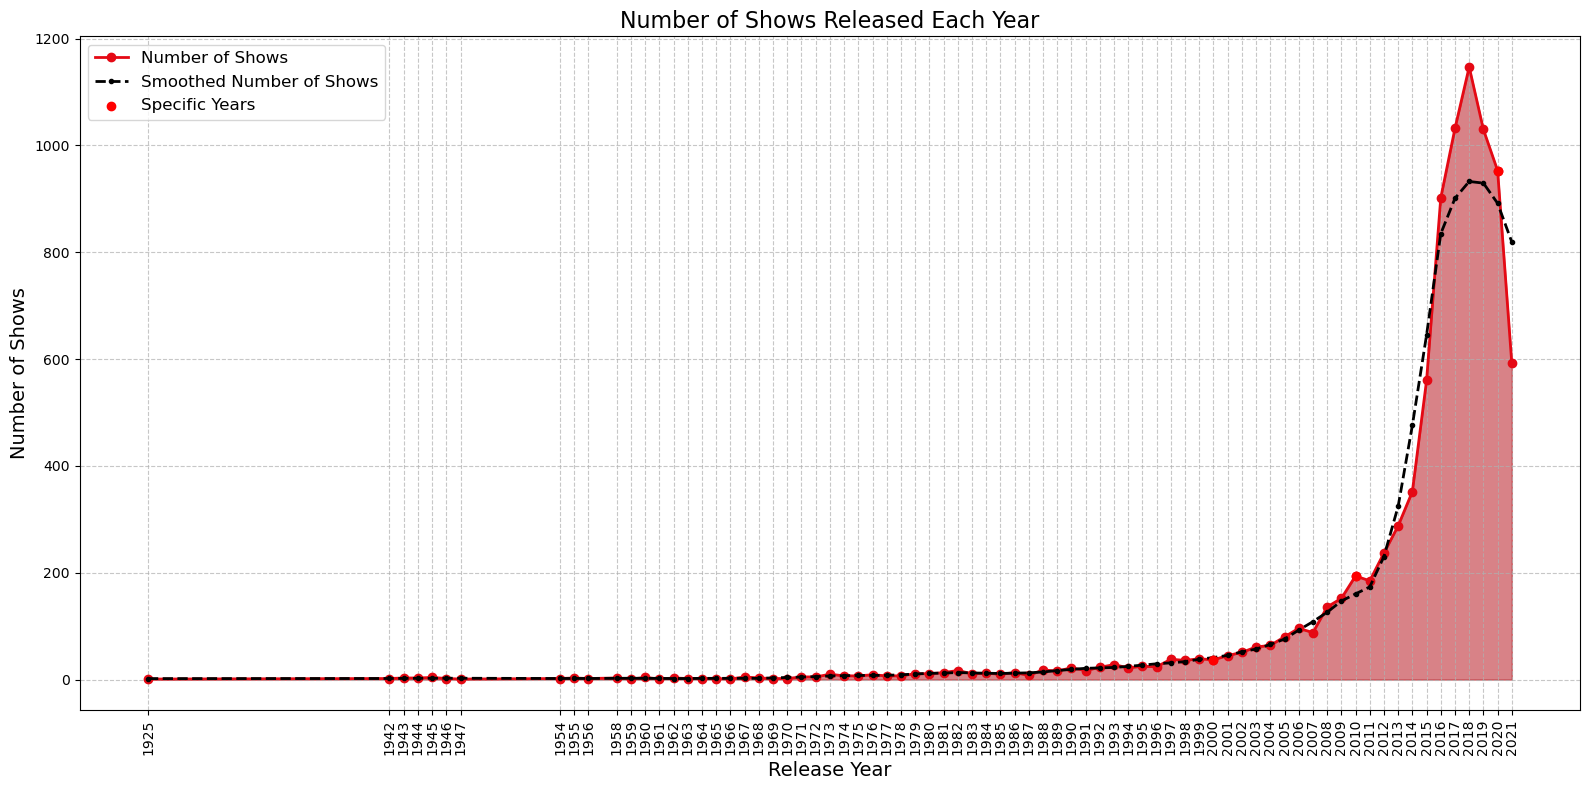

In [286]:
plt.figure(figsize=(16, 8))

plt.plot(shows_each_year.index, shows_each_year.values, marker='o', linestyle='-', color='#e50914', 
         linewidth=2, label='Number of Shows')

plt.fill_between(shows_each_year.index, shows_each_year.values, color='#b20710', alpha=0.5)

#Savitzky-Golay filter
smoothed_values = savgol_filter(shows_each_year.values, window_length=11, polyorder=2)
plt.plot(shows_each_year.index, smoothed_values, marker='.', linestyle='--', color='black', 
         linewidth=2, label='Smoothed Number of Shows')

# Highlight specific years
specific_values = shows_each_year.loc[specific_years]
plt.scatter(specific_years, specific_values, color='red', zorder=5, label='Specific Years')

#years on x-axis
plt.xticks(ticks=shows_each_year.index, rotation=90, fontsize=10)

# Add labels and title
plt.title('Number of Shows Released Each Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Shows', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

<h1> Visualizing shows released Each Year in a Histogram </h1>

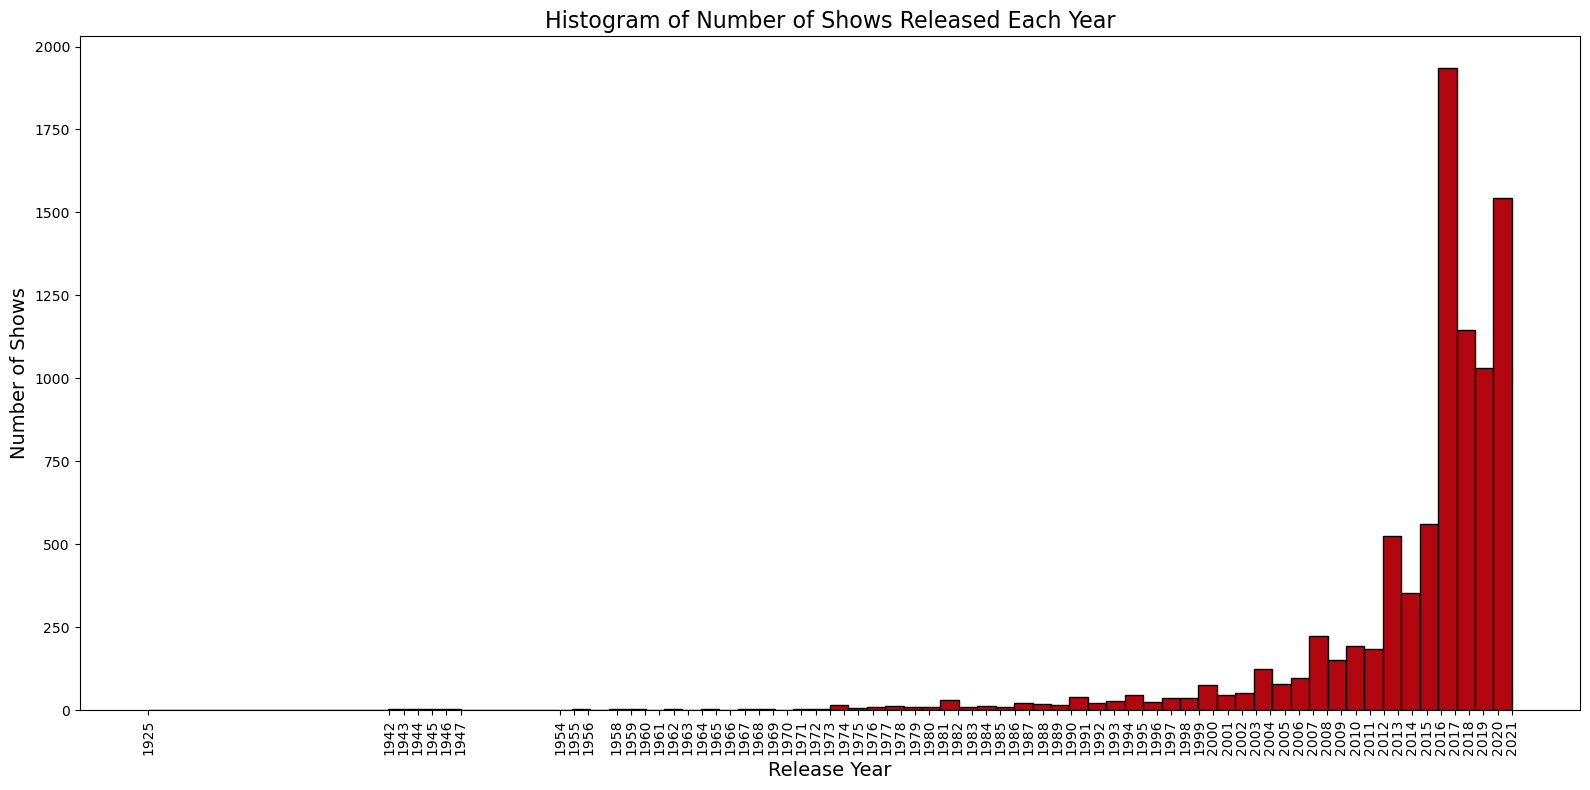

In [287]:
plt.figure(figsize=(16, 8))

# Histogram
plt.hist(shows_each_year.index, weights=shows_each_year.values, bins=len(shows_each_year.index), 
         color='#b20710', edgecolor='black')

# Add labels and title
plt.title('Histogram of Number of Shows Released Each Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Shows', fontsize=14)

# Display all years on x-axis
plt.xticks(ticks=shows_each_year.index, rotation=90, fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()


In [288]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h1> Top 10 Common Show Groups </h1>

In [289]:
genres = data['listed_in'].dropna()

genre_list = [genre for sublist in genres.str.split(', ') for genre in sublist]
genre_data = pd.DataFrame(genre_list, columns=['Genre'])
genre_counts_data = genre_data['Genre'].value_counts().reset_index()
genre_counts_data.columns = ['Genre', 'Count']
genre_counts_data = genre_counts_data.sort_values(by='Count', ascending=False)
print(genre_counts_data.head(10))

                      Genre  Count
0      International Movies   2752
1                    Dramas   2427
2                  Comedies   1674
3    International TV Shows   1351
4             Documentaries    869
5        Action & Adventure    859
6                 TV Dramas    763
7        Independent Movies    756
8  Children & Family Movies    641
9           Romantic Movies    616


<h1>Visualizing the top 10 Common show Groups </h1>

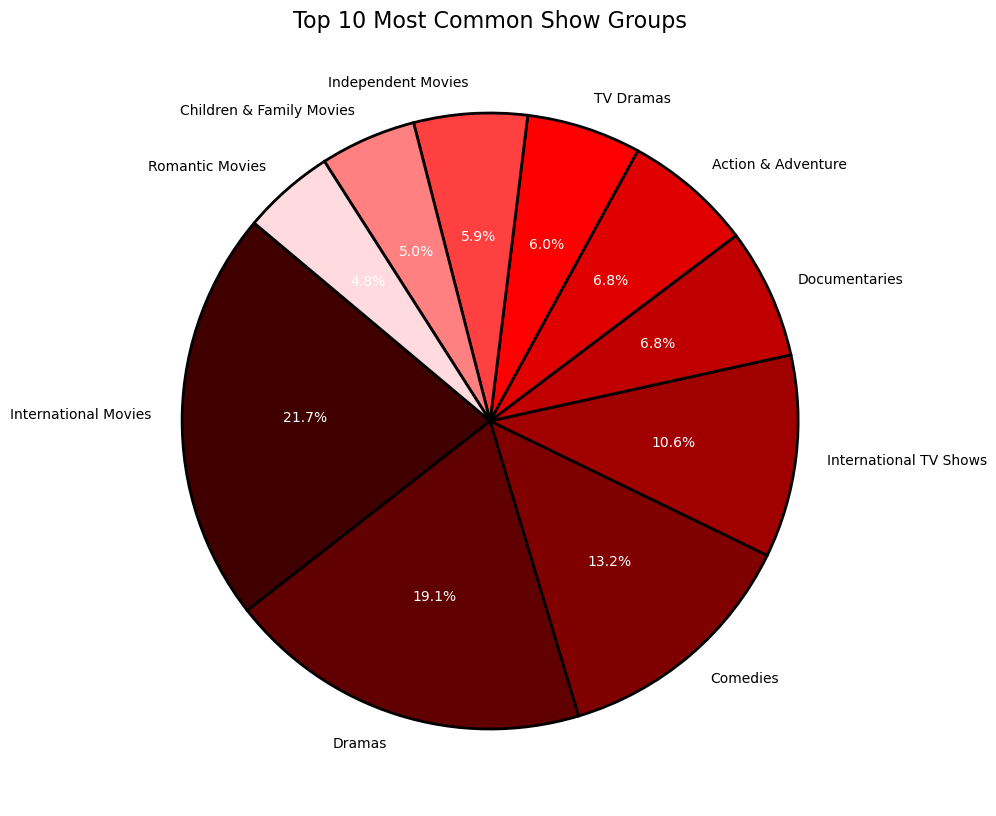

In [290]:
genre_list = [genre for sublist in genres.str.split(', ') for genre in sublist]
genre_data = pd.DataFrame(genre_list, columns=['Genre'])
genre_counts_data = genre_data['Genre'].value_counts().reset_index()
genre_counts_data.columns = ['Genre', 'Count']
top_genres = genre_counts_data.head(10)
colors = ['#400000', '#600000', '#800000', '#A00000', '#C00000', '#E00000', 
          '#FF0000', '#FF4040', '#FF8080', '#ffdade']
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', 
                                   colors=colors, startangle=140, textprops={'color': 'black'}, 
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 2})

for autotext in autotexts:
    autotext.set_color('white')
plt.title('Top 10 Most Common Show Groups', fontsize=16, color='black')
plt.show()


<h1> Top 10 Genres </h1>

In [291]:
import pandas as pd

genre_list = [genre for sublist in data['listed_in'].dropna().str.split(', ') for genre in sublist]

non_genre_categories = ['International Movies', 'International TV Shows', 
                        'TV Dramas', 'Independent Movies']

filtered_genre_list = [genre for genre in genre_list if genre not in non_genre_categories]
filtered_genre_data = pd.DataFrame(filtered_genre_list, columns=['Genre'])

genre_counts_data = filtered_genre_data['Genre'].value_counts().reset_index()
genre_counts_data.columns = ['Genre', 'Count']

top_10_genres = genre_counts_data.head(10)

print("Top 10 Genres:")
print(top_10_genres)

Top 10 Genres:
                      Genre  Count
0                    Dramas   2427
1                  Comedies   1674
2             Documentaries    869
3        Action & Adventure    859
4  Children & Family Movies    641
5           Romantic Movies    616
6               TV Comedies    581
7                 Thrillers    577
8            Crime TV Shows    470
9                  Kids' TV    451


<h1> Visualizing the Top 10 Genres in Pie Chart </h1>

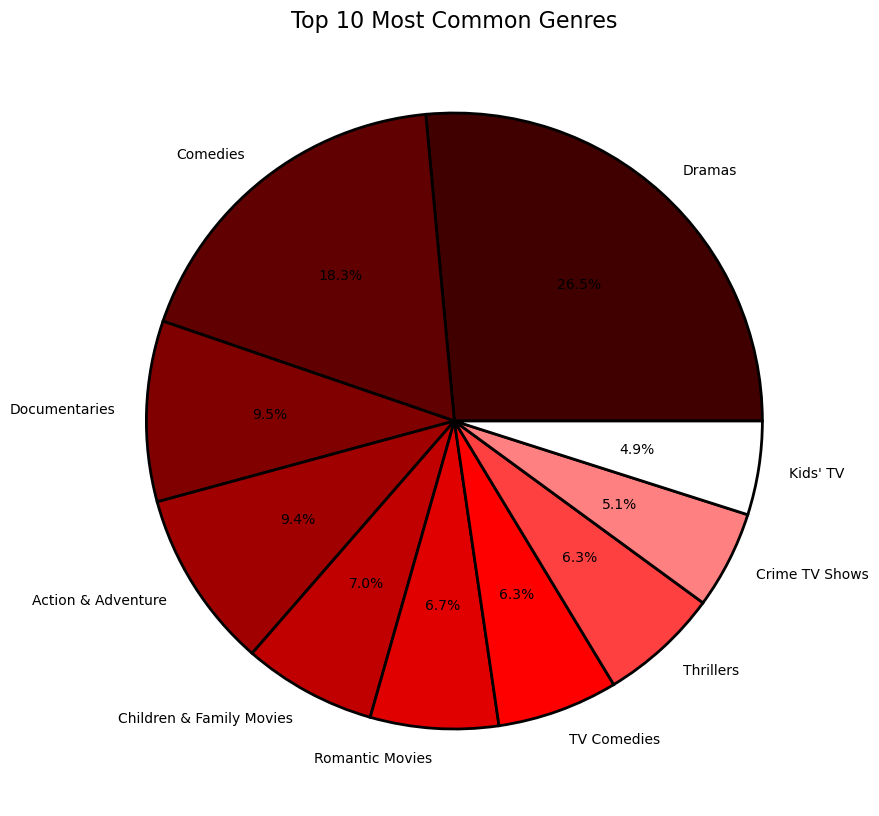

In [292]:
genre_list = [genre for sublist in genres.str.split(', ') for genre in sublist]

non_genre_categories = ['International Movies', 'International TV Shows', 
                        'TV Dramas', 'Independent Movies']

filtered_genre_list = [genre for genre in genre_list if genre not in non_genre_categories]
filtered_genre_data = pd.DataFrame(filtered_genre_list, columns=['Genre'])
genre_counts_data = filtered_genre_data['Genre'].value_counts().reset_index()
genre_counts_data.columns = ['Genre', 'Count']
top_genres = genre_counts_data.head(10)
colors = ['#400000', '#600000', '#800000', '#A00000', '#C00000', '#E00000', 
          '#FF0000', '#FF4040', '#FF8080', '#FFFFFF']
plt.figure(figsize=(15, 10))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', 
        colors=colors, textprops={'color': 'black'}, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Top 10 Most Common Genres',fontsize=16, color='black')
plt.show()


<h1> Correlation Heat Map for all Genres </h1>

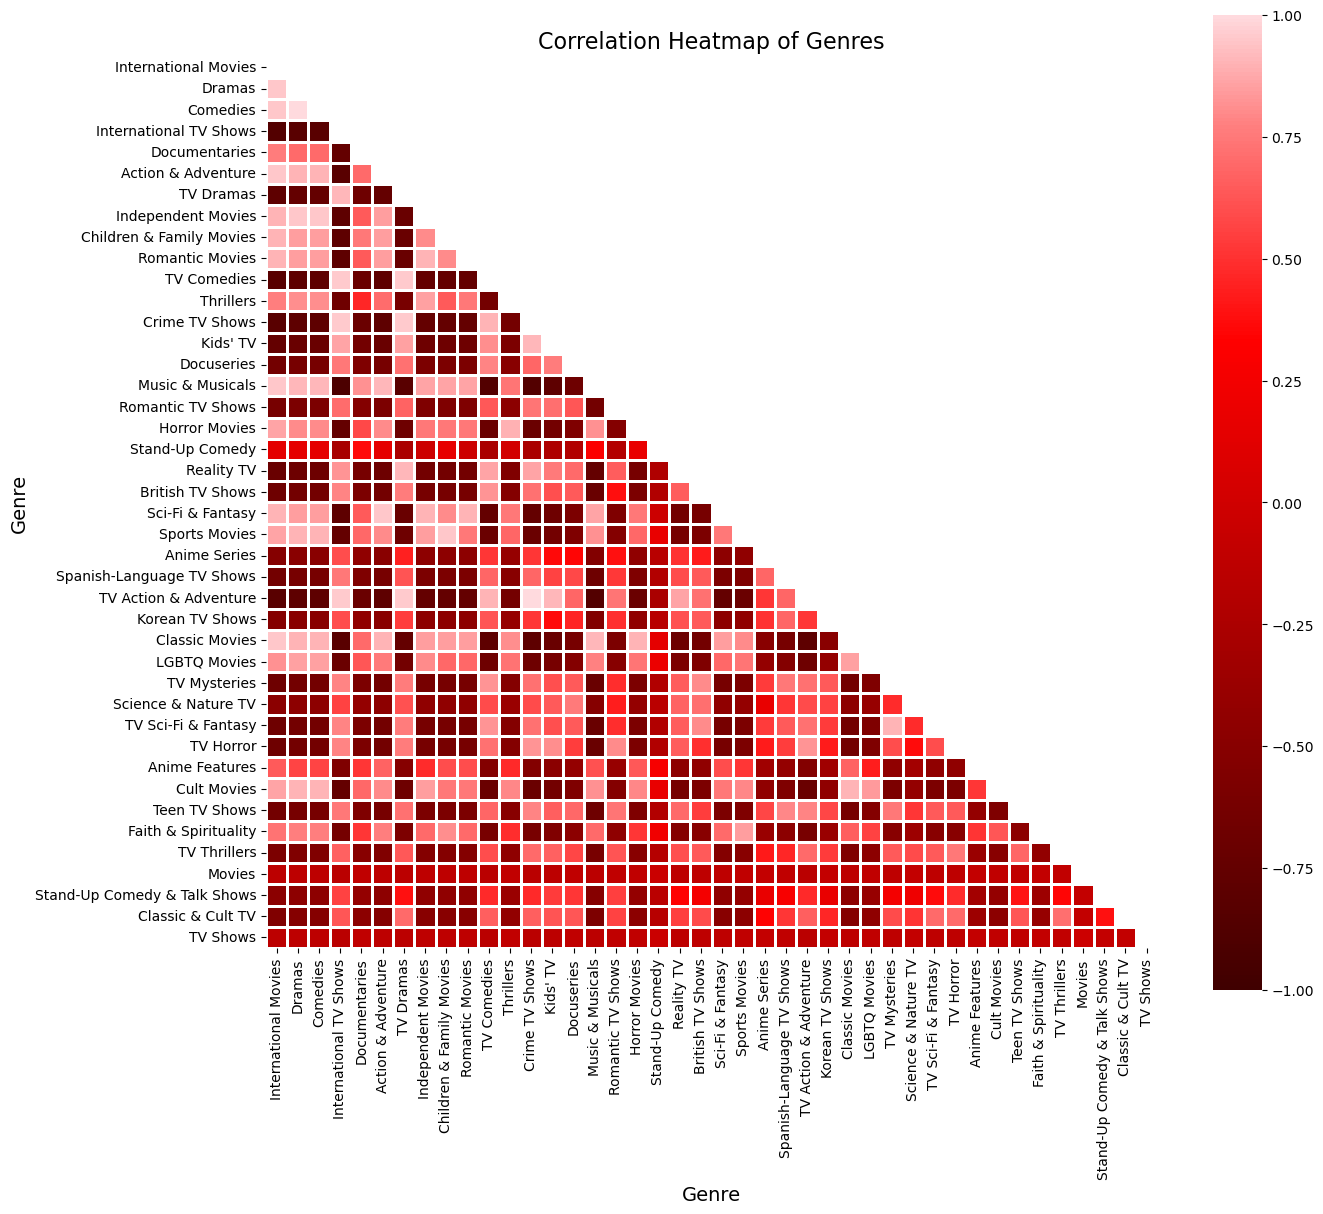

In [293]:
#list of all genres
all_genres = []
for entry in genres:
    all_genres.extend([genre.strip() for genre in entry.split(',')])

genre_df = pd.DataFrame(all_genres, columns=['Genre'])

genre_counts = genre_df['Genre'].value_counts()

unique_genres = genre_counts.index.tolist()

# binary matrix
binary_matrix = pd.DataFrame(0, index=unique_genres, columns=unique_genres)
for entry in genres:
    genre_list = [genre.strip() for genre in entry.split(',')]
    for genre1 in genre_list:
        for genre2 in genre_list:
            if genre1 in binary_matrix.index and genre2 in binary_matrix.columns:
                binary_matrix.at[genre1, genre2] = 1

correlation_matrix = binary_matrix.corr()

colors = ['#400000', '#600000', '#800000', '#A00000', '#C00000', '#E00000', 
          '#FF0000', '#FF4040', '#FF8080', '#ffdade']

cmap = LinearSegmentedColormap.from_list('custom_reds', colors, N=256)

plt.figure(figsize=(14, 14))

sns.heatmap(correlation_matrix, annot=False, cmap=cmap, vmin=-1, vmax=1,
            center=0, linewidths=1, square=True,
            cbar_kws={"shrink": .8}, mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)))

plt.title('Correlation Heatmap of Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()

<h1> Top 10 Countries producing the most Content </h1>

In [294]:
country_counts = countries.value_counts()
top_10_countries = country_counts.head(10)
top_10_countries

country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

<h1> Visualizing the Top 10 Countries producing the most Content in a Bar Graph </h1>

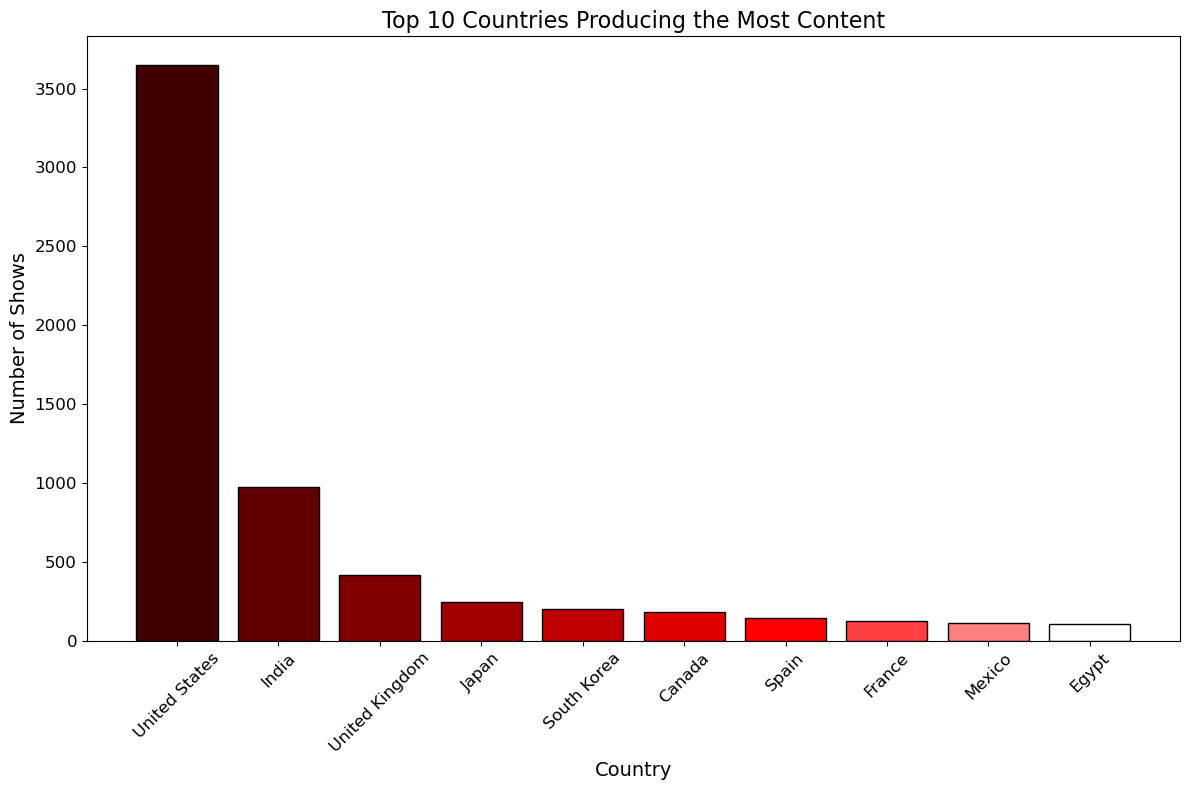

In [295]:
country_counts = countries.value_counts()

top_10_countries = country_counts.head(10)

colors = ['#400000', '#600000', '#800000', '#A00000', '#C00000', 
          '#E00000', '#FF0000', '#FF4040', '#FF8080', '#FFFFFF']

plt.figure(figsize=(12, 8))
plt.bar(top_10_countries.index, top_10_countries.values, color=colors, edgecolor='black')

plt.title('Top 10 Countries Producing the Most Content', fontsize=16, color='black')
plt.xlabel('Country', fontsize=14, color='black')
plt.ylabel('Number of Shows', fontsize=14, color='black')
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.tight_layout()
plt.show()

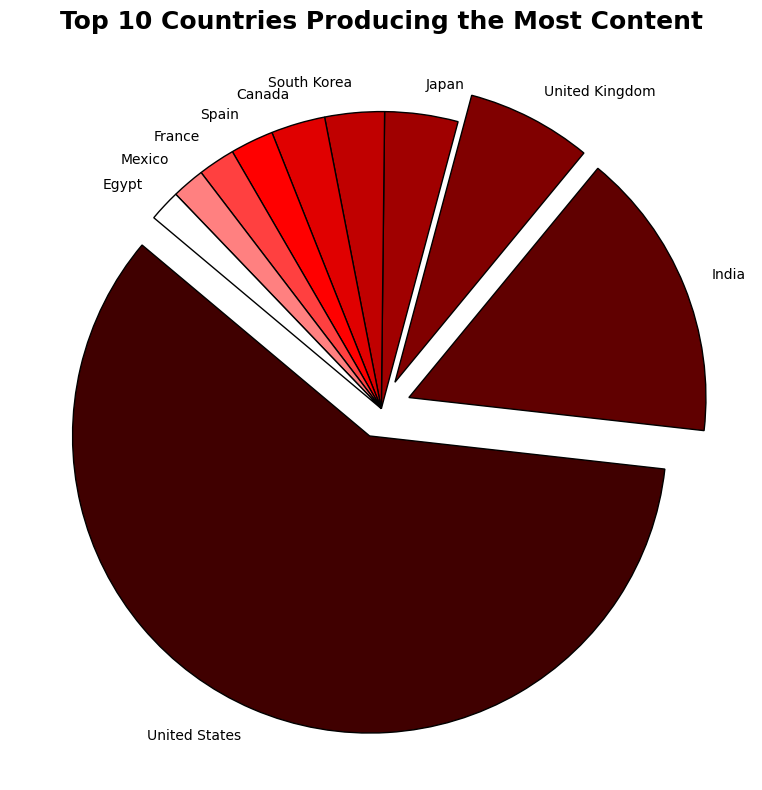

In [296]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
country_counts = countries.value_counts()
top_10_countries = country_counts.head(10)

# Define a color palette with gradient
colors = ['#400000', '#600000', '#800000', '#A00000', '#C00000', 
          '#E00000', '#FF0000', '#FF4040', '#FF8080', '#FFFFFF']

# Explode the top 3 slices for emphasis
explode = [0.1] * 3 + [0] * (len(top_10_countries) - 3)

# Create a pie chart with enhanced features
plt.figure(figsize=(12, 8))

# Create pie chart with enhanced features
plt.pie(
    top_10_countries,
    labels=top_10_countries.index,
    colors=colors,
    explode=explode,
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Add a title with a custom font
plt.title('Top 10 Countries Producing the Most Content', fontsize=18, fontweight='bold', color='black')

# Adjust the size and readability of text inside the pie chart
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Show the pie chart
plt.show()


<h1> Netflix Data Analysis End </h1>